In [20]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

(427, 640, 3)


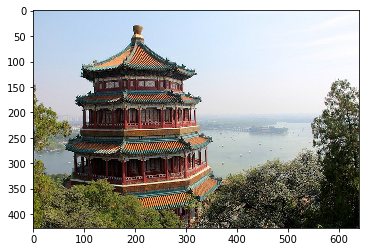

In [65]:
china = load_sample_image('china.jpg')
print(china.shape)
plt.imshow(china)
height,width,channels = china.shape

(427, 640)


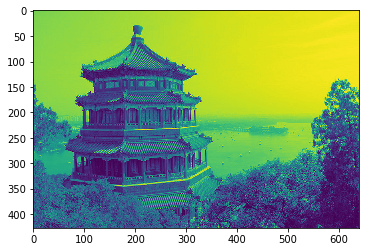

In [80]:
image = china.mean(axis=2).astype(np.float32)
print(image.shape)
plt.imshow(image)
plt.show()

In [29]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

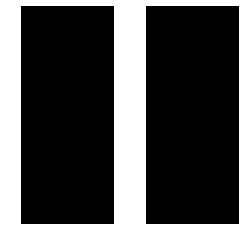

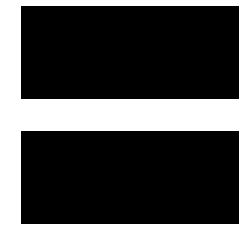

In [60]:
#创建过滤器
filter_matrix = np.zeros(shape=(7,7,2,2),dtype=np.float32)
filter_matrix[3,:,:,1] = 1
filter_matrix[:,3,:,0] = 1
plot_image(filter_matrix[:,:,0,0])
plt.show()
plot_image(filter_matrix[:,:,0,1])
plt.show()

In [96]:
image_part = image[150:220,130:250]
height,width = image_part.shape
image_test = image_part.reshape(1,height,width,1)
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=(None,height,width,1))
filter_test = np.zeros(shape=(7,7,1,2),dtype=np.float32)
filter_test[3,:,:,1] = 1
filter_test[:,3,:,0] = 1
convolution = tf.nn.conv2d(X,filter_test,strides=[1,1,1,1],padding='SAME')
with tf.Session() as sess:
    output = sess.run(convolution,feed_dict={X:image_test})

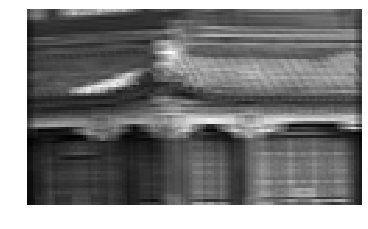

In [97]:
plot_image(output[0,:,:,1])
plt.show()

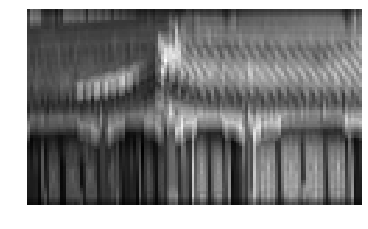

In [98]:
plot_image(output[0,:,:,0])
plt.show()

# 用keras构建LeNet代码

In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import Activation 
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

In [50]:
class LeNet:
    @staticmethod
    def build(input_shape,classes):
        model = Sequential()
        
        #添加卷积层
        model.add(Convolution2D(filters=20,kernel_size=5,strides=(1,1),padding='same',input_shape=input_shape))
        model.add(Activation('relu'))
        #添加池化层
        model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))
        
        model.add(Convolution2D(filters=50,kernel_size=5,strides=(1,1),padding='same',input_shape=input_shape))
        model.add(Activation('relu'))
        #添加池化层
        model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))
        
        #添加Flatten层
        model.add(Flatten())
        #添加全链接层
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model

In [51]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [52]:
#对训练数据和测试数据进行归一化
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train = x_train / 255
x_test = x_test / 255
#我们需要使用60000*1*28*28作为卷积网络的输入
x_train = x_train[:,np.newaxis,:,:]
x_test = x_test[:,np.newaxis,:,:]
print(x_train.shape)

(60000, 1, 28, 28)


In [53]:
from tensorflow.keras.utils import to_categorical
#将类向量转换为二值类别矩阵
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [87]:
rows,cols = 28,28
nClasses = 10
batch_size = 128
epochs = 10

input_shape = (1,rows,cols)
model = LeNet.build(input_shape=input_shape,classes=nClasses)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)
score = model.evaluate(x_test,y_test,verbose=1)
print('test score:',score[0])
print('test accuracy:',score[1])
print('history:',history.history.keys())

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s 354us/sample - loss: 0.3592 - acc: 0.8945 - val_loss: 0.1275 - val_acc: 0.9628
Epoch 2/10
48000/48000 [==============================] - 19s 399us/sample - loss: 0.1065 - acc: 0.9678 - val_loss: 0.0879 - val_acc: 0.9727
Epoch 3/10
48000/48000 [==============================] - 16s 329us/sample - loss: 0.0735 - acc: 0.9774 - val_loss: 0.0727 - val_acc: 0.9780
Epoch 4/10
48000/48000 [==============================] - 19s 387us/sample - loss: 0.0581 - acc: 0.9822 - val_loss: 0.0874 - val_acc: 0.9728
Epoch 5/10
48000/48000 [==============================] - 20s 416us/sample - loss: 0.0468 - acc: 0.9855 - val_loss: 0.0564 - val_acc: 0.9822
Epoch 6/10
48000/48000 [==============================] - 15s 305us/sample - loss: 0.0392 - acc: 0.9875 - val_loss: 0.0500 - val_acc: 0.9845
Epoch 7/10
48000/48000 [==============================] - 17s 345us/sample - loss: 0.0313 - acc: 0.9900 

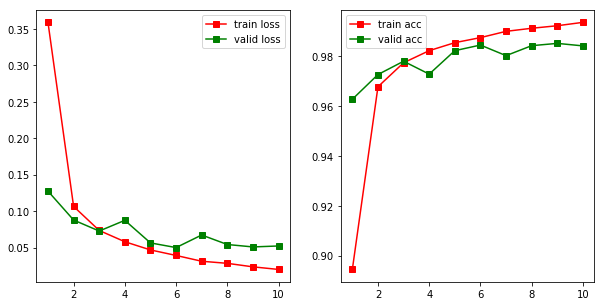

In [88]:
#绘制模型评价图
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
plt.plot(np.linspace(1,epochs,epochs),history.history['loss'],'r-s',label='train loss')
plt.plot(np.linspace(1,epochs,epochs),history.history['val_loss'],'g-s',label='valid loss')
plt.legend()
ax = plt.subplot(1,2,2)
plt.plot(np.linspace(1,epochs,epochs),history.history['acc'],'r-s',label='train acc')
plt.plot(np.linspace(1,epochs,epochs),history.history['val_acc'],'g-s',label='valid acc')
plt.legend()
plt.show()

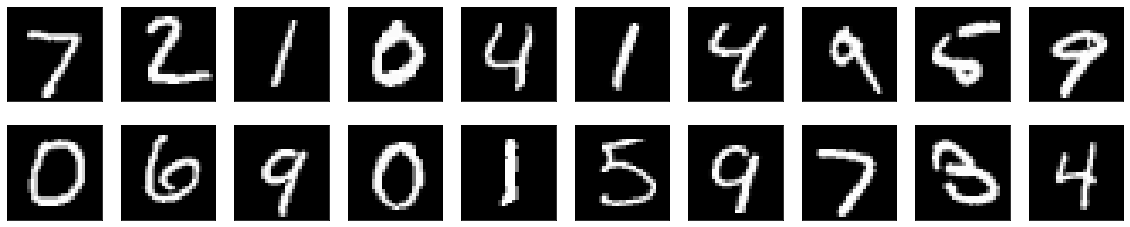

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [89]:
x_test_predict = model.predict_classes(x_test)
n = 20
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print(x_test_predict[:20])